# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [2]:
colNames = ['mpg',
            'cylinders',
            'displacment',
            'horsepower',
            'weight',
            'acceleration',
            'model year',
            'origin',
            'car name']

In [3]:
Cars_Data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',names=colNames,delim_whitespace=True)
Cars_Data.head()

,mpg,cylinders,displacment,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
Cars_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacment     398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
Cars_Data.shape

(398, 9)

In [6]:
Cars_Data.describe()

,mpg,cylinders,displacment,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [7]:
#Found missing values in horse power where they were denoted by ?. This was found during eyeballing the data in excel

# From whatever knowledge i have about cars i can say that replacing these missing values with mean,median or mode of that column is not right

# Horse power should technically have positive correlation with clylenders and displacement. So am going to find missing horse powers with regression model first

In [8]:

Cars_Data.horsepower.replace(to_replace='?',value='0',inplace=True)

In [9]:
Cars_Data["horsepower"] = Cars_Data.horsepower.astype(float)

In [10]:
medianToReplace = Cars_Data.horsepower.median()
Cars_Data.horsepower.replace(to_replace=0,value=medianToReplace,inplace=True)

In [11]:
# Introducing dummies for origin as directed by the comment below
Cars_Data = pd.concat([Cars_Data, pd.get_dummies(Cars_Data['origin'],prefix='origin')], axis=1)

In [12]:
Cars_Data.drop(axis=1,columns='origin',inplace=True)
Cars_Data.head()

,mpg,cylinders,displacment,horsepower,weight,acceleration,model year,car name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,1,0,0


In [13]:
# Converting model year into age of car as directed by the question comments below
Cars_Data["CarAge"] = 83- Cars_Data['model year']
Cars_Data.head()

,mpg,cylinders,displacment,horsepower,weight,acceleration,model year,car name,origin_1,origin_2,origin_3,CarAge
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,1,0,0,13
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,1,0,0,13
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,1,0,0,13
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,1,0,0,13
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,1,0,0,13


In [14]:
Cars_Data.drop(axis=1,columns='model year',inplace=True)

In [15]:
Cars_Data.shape

(398, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

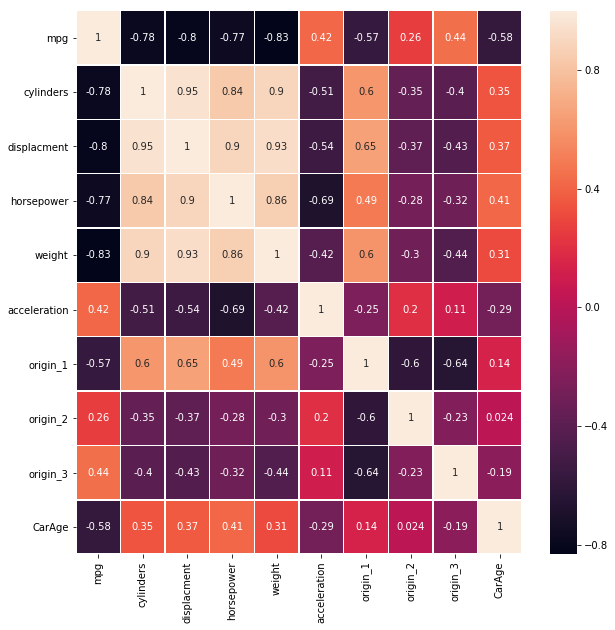

In [16]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(Cars_Data.corr(),annot=True,linewidths=0.5,ax=ax);

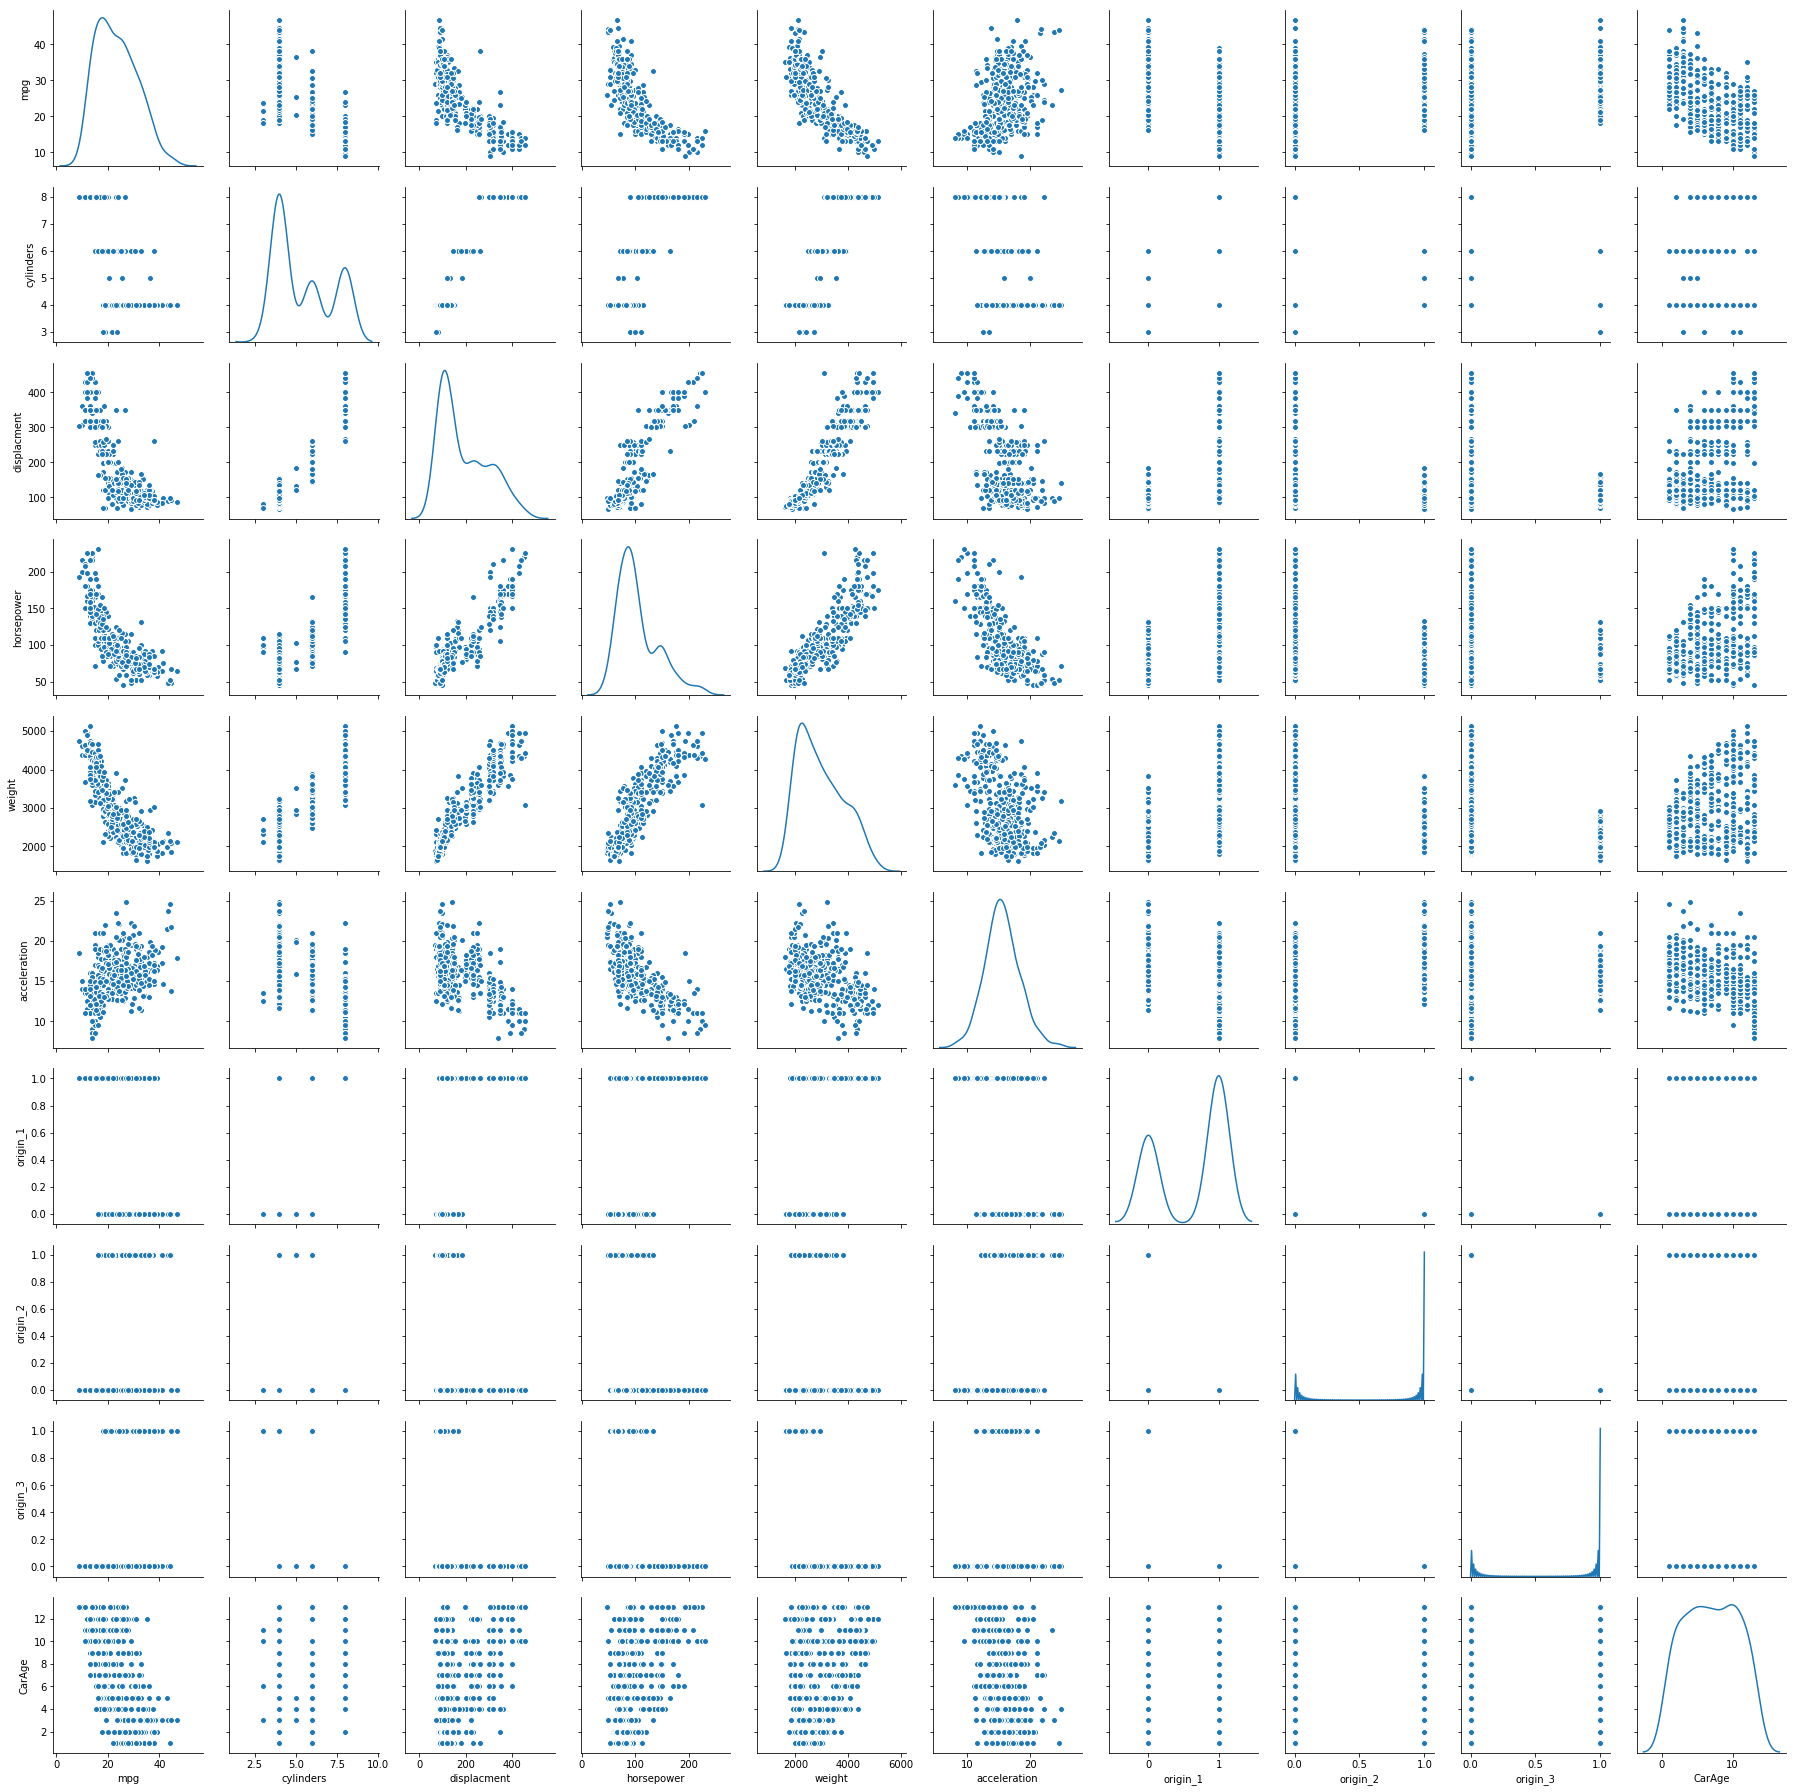

In [17]:
sns.pairplot(Cars_Data,diag_kind='kde')

In [18]:
#Observations

# there is a minimum of 2 guassian and a max of 6 .SO we are expecting clusters between 2 and 6

# AGe of the car appears to be inversely propotional to the mileage. (i.e.) younger cars seem to be giving better mileage

# More Cylenders = better horse power & Displacement and lesser mileage

# Heavier the car - greater the num of cylenders,horsepower and displacement and lesser the mileage


# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [19]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age



##### All points except removing duplicate done in above steps

###### Removing duplicates now


In [20]:
Cars_Data.loc[Cars_Data.loc[:,Cars_Data.columns != 'car name'].duplicated(keep='first')==True]

,mpg,cylinders,displacment,horsepower,weight,acceleration,car name,origin_1,origin_2,origin_3,CarAge


##### No duplicates could be found

# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [21]:
# Missing value check was done above and hp column was treated with median values
# Let us check for outliers now

In [22]:
from scipy import stats
z = np.abs(stats.zscore(Cars_Data.loc[:,Cars_Data.columns != 'car name']))
print(z)

[[0.7064387  1.49819126 1.0906037  ... 0.46196822 0.49764335 1.62742629]
 [1.09075062 1.49819126 1.5035143  ... 0.46196822 0.49764335 1.62742629]
 [0.7064387  1.49819126 1.19623199 ... 0.46196822 0.49764335 1.62742629]
 ...
 [1.08701694 0.85632057 0.56103873 ... 0.46196822 0.49764335 1.62198339]
 [0.57460104 0.85632057 0.70507731 ... 0.46196822 0.49764335 1.62198339]
 [0.95891297 0.85632057 0.71467988 ... 0.46196822 0.49764335 1.62198339]]


In [31]:
print(np.where(z > 3)[0])

[  6   8  13  95 116 299 394]


In [32]:
Cars_Data.shape

(398, 11)

In [33]:
Cars_Data.drop(np.where(z > 3)[0],axis=0,inplace=True)

In [34]:
Cars_Data.shape

(391, 11)

# Q7. Create appropriate clusters with the new data set

In [35]:
# Let us check optimal number of clusters-


cluster_range = range( 1, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(Cars_Data.loc[:,Cars_Data.columns != 'car name'])
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2.787144e+08
1,2,7.112967e+07
2,3,3.347715e+07
3,4,1.832678e+07
4,5,1.330718e+07


# Q8. Identify the appropriate clusters with result from above question

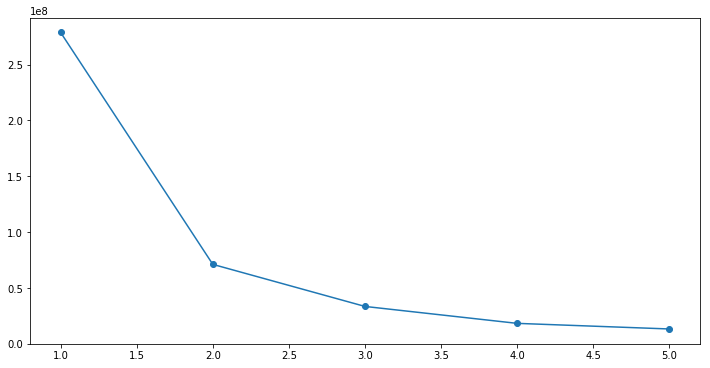

In [36]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [37]:
# Performing K means again for 3 clusters

kmeans = KMeans(n_clusters=3)

# Fitting the input data

kmeans = kmeans.fit(Cars_Data.loc[:,Cars_Data.columns != 'car name'])
prediction= kmeans.predict(Cars_Data.loc[:,Cars_Data.columns != 'car name'])
centroids = kmeans.cluster_centers_
prediction


array([1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0,

#### From the above plot we conclude that we have 3 clusters in this dataset

# Q9. Check for no of values in each cluster and centers for each variables. 

In [38]:
Cars_Data['Category']=prediction

In [39]:
Cars_Data.shape

(391, 12)

In [40]:
Cars_Data.head()

,mpg,cylinders,displacment,horsepower,weight,acceleration,car name,origin_1,origin_2,origin_3,CarAge,Category
0,18.0,8,307.0,130.0,3504.0,12.0,chevrolet chevelle malibu,1,0,0,13,1
1,15.0,8,350.0,165.0,3693.0,11.5,buick skylark 320,1,0,0,13,2
2,18.0,8,318.0,150.0,3436.0,11.0,plymouth satellite,1,0,0,13,1
3,16.0,8,304.0,150.0,3433.0,12.0,amc rebel sst,1,0,0,13,1
4,17.0,8,302.0,140.0,3449.0,10.5,ford torino,1,0,0,13,1


In [41]:
print ('centroids are :')
print(centroids)

centroids are :
[[2.96723757e+01 4.03867403e+00 1.07008287e+02 7.74530387e+01
  2.21815470e+03 1.63132597e+01 3.37016575e-01 2.76243094e-01
  3.86740331e-01 6.29834254e+00]
 [2.08524194e+01 5.77419355e+00 2.09266129e+02 1.04306452e+02
  3.15377419e+03 1.59056452e+01 7.90322581e-01 1.37096774e-01
  7.25806452e-02 6.57258065e+00]
 [1.46651163e+01 7.86046512e+00 3.39639535e+02 1.54686047e+02
  4.22396512e+03 1.36302326e+01 9.88372093e-01 1.16279070e-02
  3.05311332e-16 8.87209302e+00]]


In [42]:
Cars_Data.groupby(['Category']).groups.keys()

dict_keys([0, 1, 2])

In [43]:
print('For cluster 0, the total no is '+ np.str(len(Cars_Data.groupby(['Category']).groups[0])))
print('For cluster 1, the total no is '+ np.str(len(Cars_Data.groupby(['Category']).groups[1])))
print('For cluster 2, the total no is '+ np.str(len(Cars_Data.groupby(['Category']).groups[2])))

For cluster 0, the total no is 181
For cluster 1, the total no is 124
For cluster 2, the total no is 86


# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


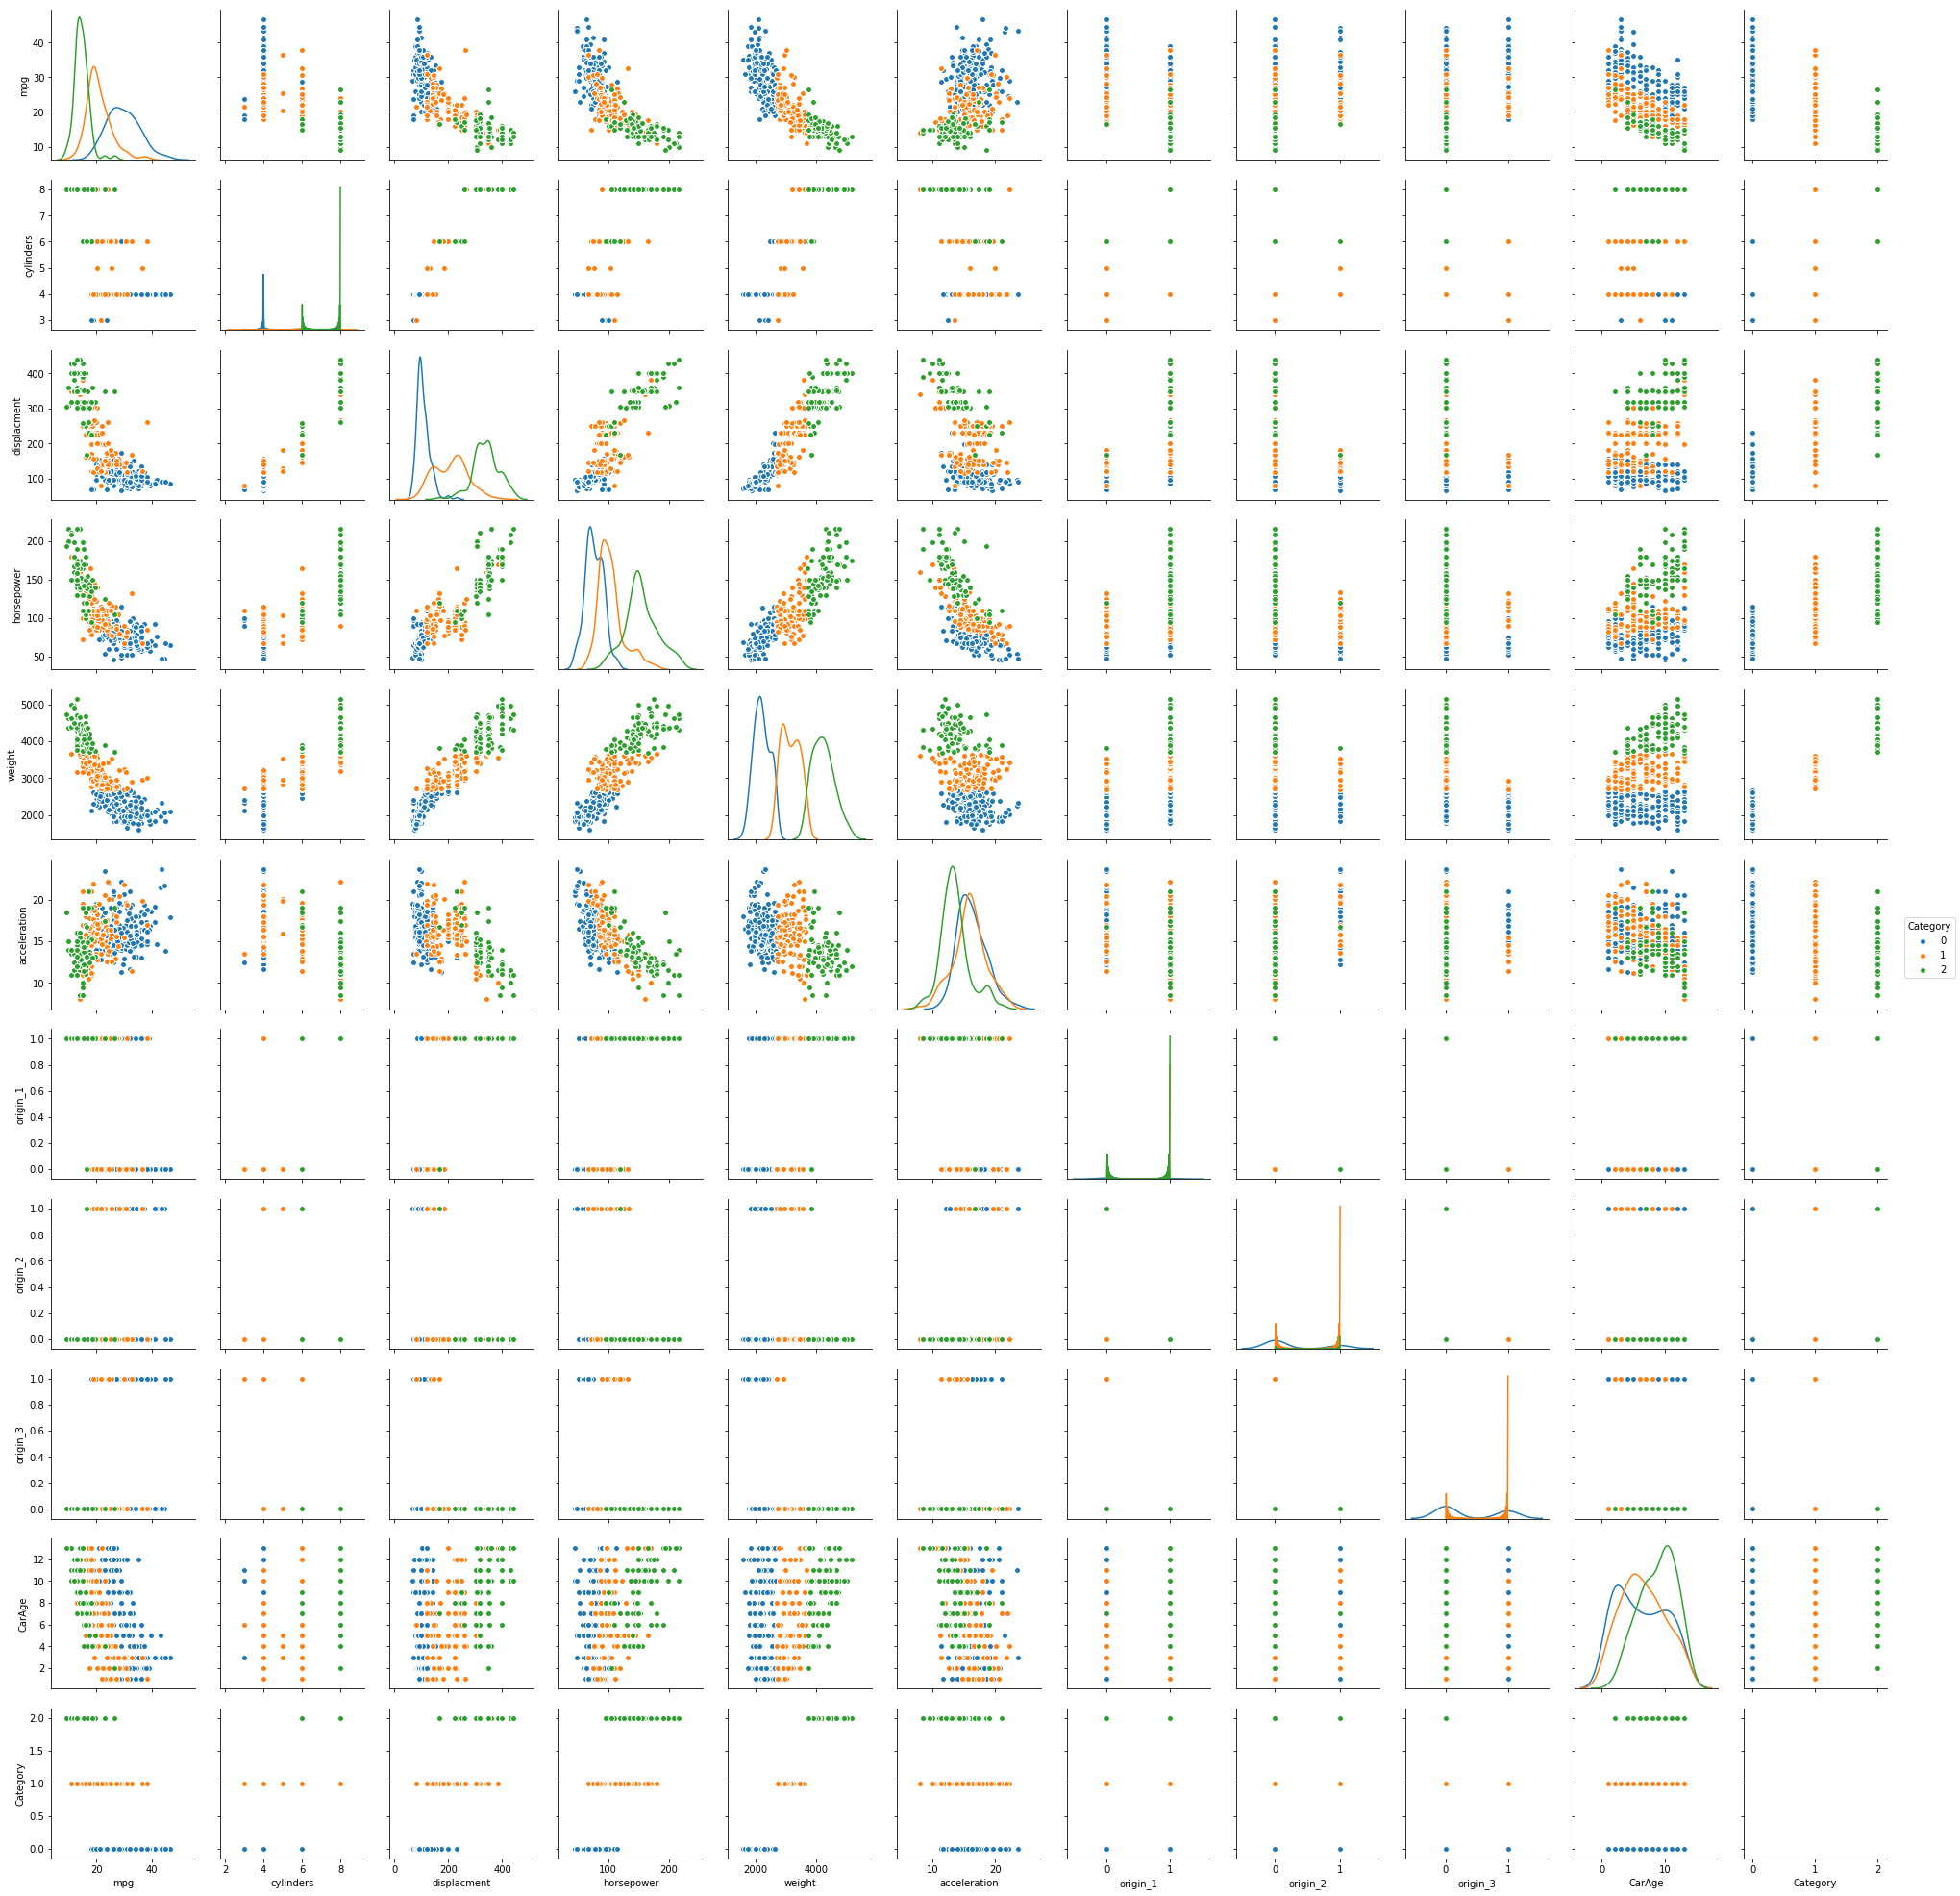

In [46]:
sns.pairplot(Cars_Data,diag_kind='kde',hue='Category')

E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


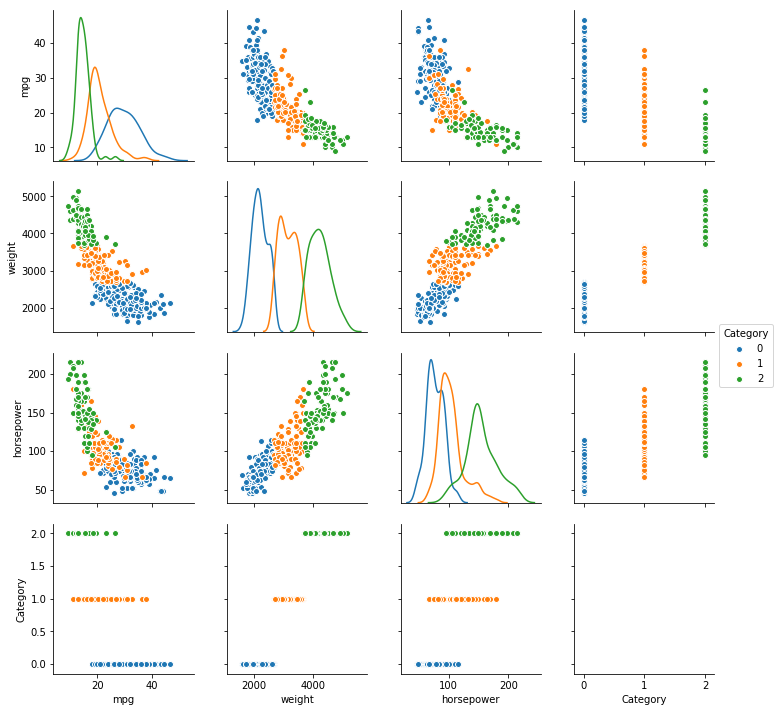

In [47]:
# The above plot predsents a very interesting relationship between mpg,weight and horsepower based on each category
# Plotting pair plot again for tehse variables alone
sns.pairplot(Cars_Data[['mpg','weight','horsepower','Category']],diag_kind='kde',hue='Category')

### Inferences

#### Category 0 has highest mileage,least weight ,least horsepower - probably representing entry level cars targetting budget audience

#### Category 1 has cars with the next best mileage,next least weight,horsepower - probably representing mid segment of cars

#### Category 2 has least mileage ,heavy weights,high horse power - representing luxary car segment targetting wealthy buyers

In [ ]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('d:\groups.xls')
cars_df.to_excel(writer,'Sheet1')
writer.save()

In [ ]:
# We can try similar analysis for 3 grps as well to check if we get more clear distinction among groups